In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append("../")

# Create the files first

python removal_rmse_script.py

In [21]:
traces = np.load("../data/one_beat_array_1000.npy")
traces = traces[:1000, :, :]

In [40]:
def plot_removal_rmse(df_err, traces, pixels, n_subjects, chan=0):
    """
    df_err: dataframe with 2 columns, start_pixel and rmse
    traces: averaged heartbeat trace
    pixels: how many pixels removed
    n_subjects: rmse calculated using as many subjects
    chan: channel used in averaged, for plotting only
    """
    
    start_pixel = df_err['start_pixel'].min()
    end_pixel = df_err['start_pixel'].max()
    p = [x for x in range(start_pixel, end_pixel)]

    avg_chan_0 = np.mean(traces[:, :, chan], axis= 0)
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Start Removal Pixel')
    ax1.set_ylabel('RMSE', color=color)
    ax1.plot(df_err['start_pixel'], df_err['rmse'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

    color = 'tab:green'
    ax2.set_ylabel(f'Averaged Beat for channel {chan}, {n_subjects} subjects', color=color)  # we already handled the x-label with ax1
    ax2.plot(p, avg_chan_0[start_pixel:end_pixel], color=color, alpha=0.5)
    ax2.tick_params(axis='y', labelcolor=color)

    # fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f"{pixels} pixels removed; 1000 subjects")
    # plt.savefig(f"{results_dir}/n{n_subjects}_s{pixels}.png")
    plt.show()
    # plt.close()

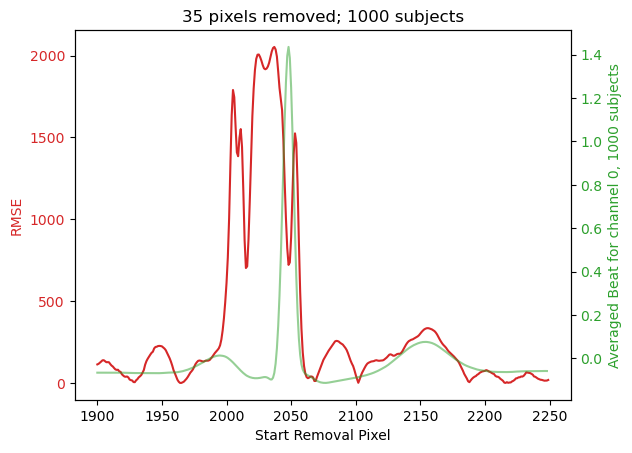

In [44]:
p = 35
df_err = pd.read_csv(f"../removal_data_repl_regression/rmse_{p}pixels_1000sub.csv")
plot_removal_rmse(df_err, traces, p, 1000)

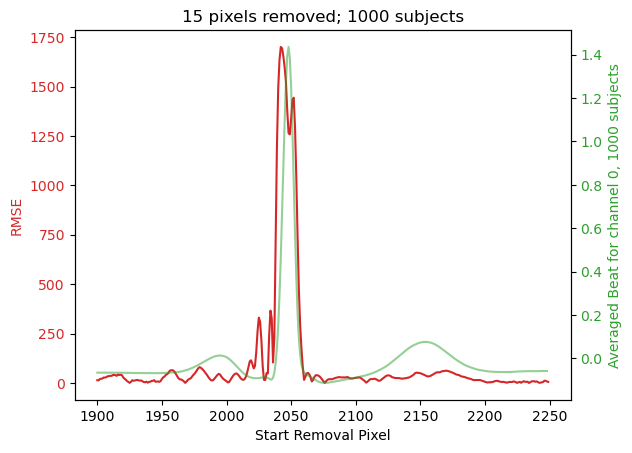

In [29]:
start = 2030
end = 2050

distance = end - start 
float(trace[0, start - 1, 0]), float(trace[0, end + 1, 0])

(-0.0711384043097496, 1.4663429260253906)

In [30]:
step = (float(trace[0, end + 1, 0]) - float(trace[0, start - 1, 0])) / distance
np.arange(float(trace[0, start - 1, 0]), float(trace[0, end + 1, 0]), step)

array([-0.0711384 ,  0.00573566,  0.08260973,  0.1594838 ,  0.23635786,
        0.31323193,  0.39010599,  0.46698006,  0.54385413,  0.62072819,
        0.69760226,  0.77447633,  0.85135039,  0.92822446,  1.00509853,
        1.08197259,  1.15884666,  1.23572073,  1.31259479,  1.38946886])

In [34]:
trace_[0, 2030:2050, 0] = np.arange(float(trace[0, start - 1, 0]), float(trace[0, end + 1, 0]), step)

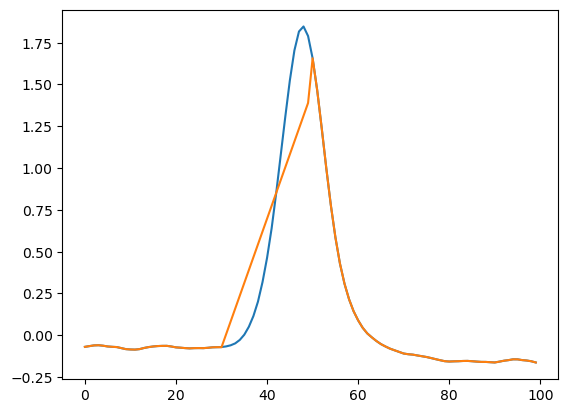

In [35]:
plt.plot(trace[0, 2000:2100, 0])
plt.plot(trace_[0, 2000:2100, 0])

In [36]:
traces.shape

(1000, 4096, 12)

In [ ]:
def plot_removal_rmse(df_err, traces, pixels, n_subjects):
    start_pixel = df_err['start_pixel'].min()
    end_pixel = df_err['start_pixel'].max()
    p = [x for x in range(start_pixel, end_pixel)]

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Start Removal Pixel')
    ax1.set_ylabel('RMSE', color=color)
    ax1.set_ylim(0, 2500)
    ax1.plot(df_err['start_pixel'], df_err['rmse'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

    color = 'tab:green'
    ax2.set_ylabel('Averaged Beat', color=color)  # we already handled the x-label with ax1
    ax2.plot(p, traces[10, start_pixel:end_pixel, 0], color=color, alpha=0.5)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f"{pixels} pixels removed; 1000 subjects")
    # plt.savefig(f"n{n_subjects}_s{pixels}.png")
    plt.show()
    plt.close()


In [ ]:
for i in range(10, 26):
    filename = f"rmse_{i}pixels_1000sub.csv"
    df = pd.read_csv(filename)
    plot_removal_rmse(df, traces, pixels=i, n_subjects=1000)

In [ ]:
# Plotting just 2: 10 and 20 pixel removal with respective offsets

plt.figure(figsize=(10, 8))
for i in (10, 20):
    filename = f"rmse_{i}pixels_1000sub.csv"
    
    df_err = pd.read_csv(filename)
    plt.plot(df_err['start_pixel'] + i, df_err['rmse'], label=i)

    # plt.plot(p, traces[10, start_pixel:end_pixel, 0], alpha=0.5)
    plt.xlabel("Start Pixel")
    plt.ylabel("RMSE")
    plt.legend()


In [ ]:
# Plotting 10 and 20 pixel removal with offsets, and one subject's averaged heartbeat

start_pixel = df_err['start_pixel'].min()
end_pixel = df_err['start_pixel'].max()
p = [x for x in range(start_pixel, end_pixel)]

fig, ax1 = plt.subplots(figsize=(10, 8))

color = 'tab:red'
ax1.set_xlabel('Start Removal Pixel')
ax1.set_ylabel('RMSE', color=color)
ax1.set_ylim(0, 2500)
df_err = pd.read_csv("rmse_10pixels_1000sub.csv")
ax1.plot(df_err['start_pixel'] + 10, df_err['rmse'], color=color)
df_err = pd.read_csv("rmse_20pixels_1000sub.csv")
ax1.plot(df_err['start_pixel'] + 20, df_err['rmse'], color='black')

ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Averaged Beat', color=color)  # we already handled the x-label with ax1
ax2.plot(p, traces[27, start_pixel:end_pixel, 0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.title(f"{pixels} pixels removed; 1000 subjects")
# plt.savefig(f"n{n_subjects}_s{pixels}.png")
plt.show()